In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### A cubic zirconia manufacturer has collected a dataset containing the prices and attributes of nearly 27,000 stones. Cubic zirconia is a popular and affordable alternative to diamonds, sharing many of the same physical qualities. The company has observed varying profit margins across different price ranges and aims to improve its pricing strategy. The goal of this project is to build a predictive model that can accurately estimate the price of a stone based on its characteristics. This will help the company identify which stones are likely to yield higher profits and optimize decision-making. Additionally, the analysis seeks to highlight the top five attributes that have the greatest influence on price prediction.

In [78]:
df = pd.read_csv("C:/Users/SAMIKSHA/Downloads/cubic_zirconia.csv")

In [79]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [80]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [81]:
df.shape

(26967, 11)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [83]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [84]:
df.describe(include="all")

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


### Drop the column Unnamed: 0 as it is not needed in further steps.

In [85]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### Check for duplicate rows

In [86]:
df.duplicated().all()

False

### Check for null values in the data

In [87]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

#### It is observed that there are 697 null values in the column "depth"

In [88]:
df['depth'].describe()

count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [89]:
df['depth'].isnull().mean()

0.025846404865205622

<AxesSubplot:xlabel='depth', ylabel='Count'>

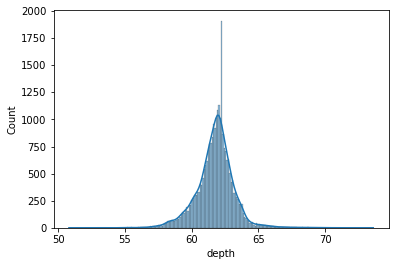

In [90]:
sns.histplot(df['depth'], kde=True)

In [91]:
df['depth'].skew()

-0.028618055138992692

### Imputing null values in column depth with mean.

In [92]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

In [93]:
df['depth'].isnull().sum()

0

### Check for any 0 values in the dataset.

In [94]:
((df == 0).sum() / len(df)) * 100

carat      0.000000
cut        0.000000
color      0.000000
clarity    0.000000
depth      0.000000
table      0.000000
x          0.011125
y          0.011125
z          0.033374
price      0.000000
dtype: float64

In [95]:
df[(df == 0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### There are 9 rows where x, y and z values are zero. Since, these are the dimensions of the cubic zirconia, it cannot be possible for them to be zero. So, we can drop them as there are only 9 rows.

In [96]:
df.replace(0, np.NaN, inplace=True)

In [97]:
df.dropna(inplace=True)

In [98]:
df[(df == 0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price


## Pairplot

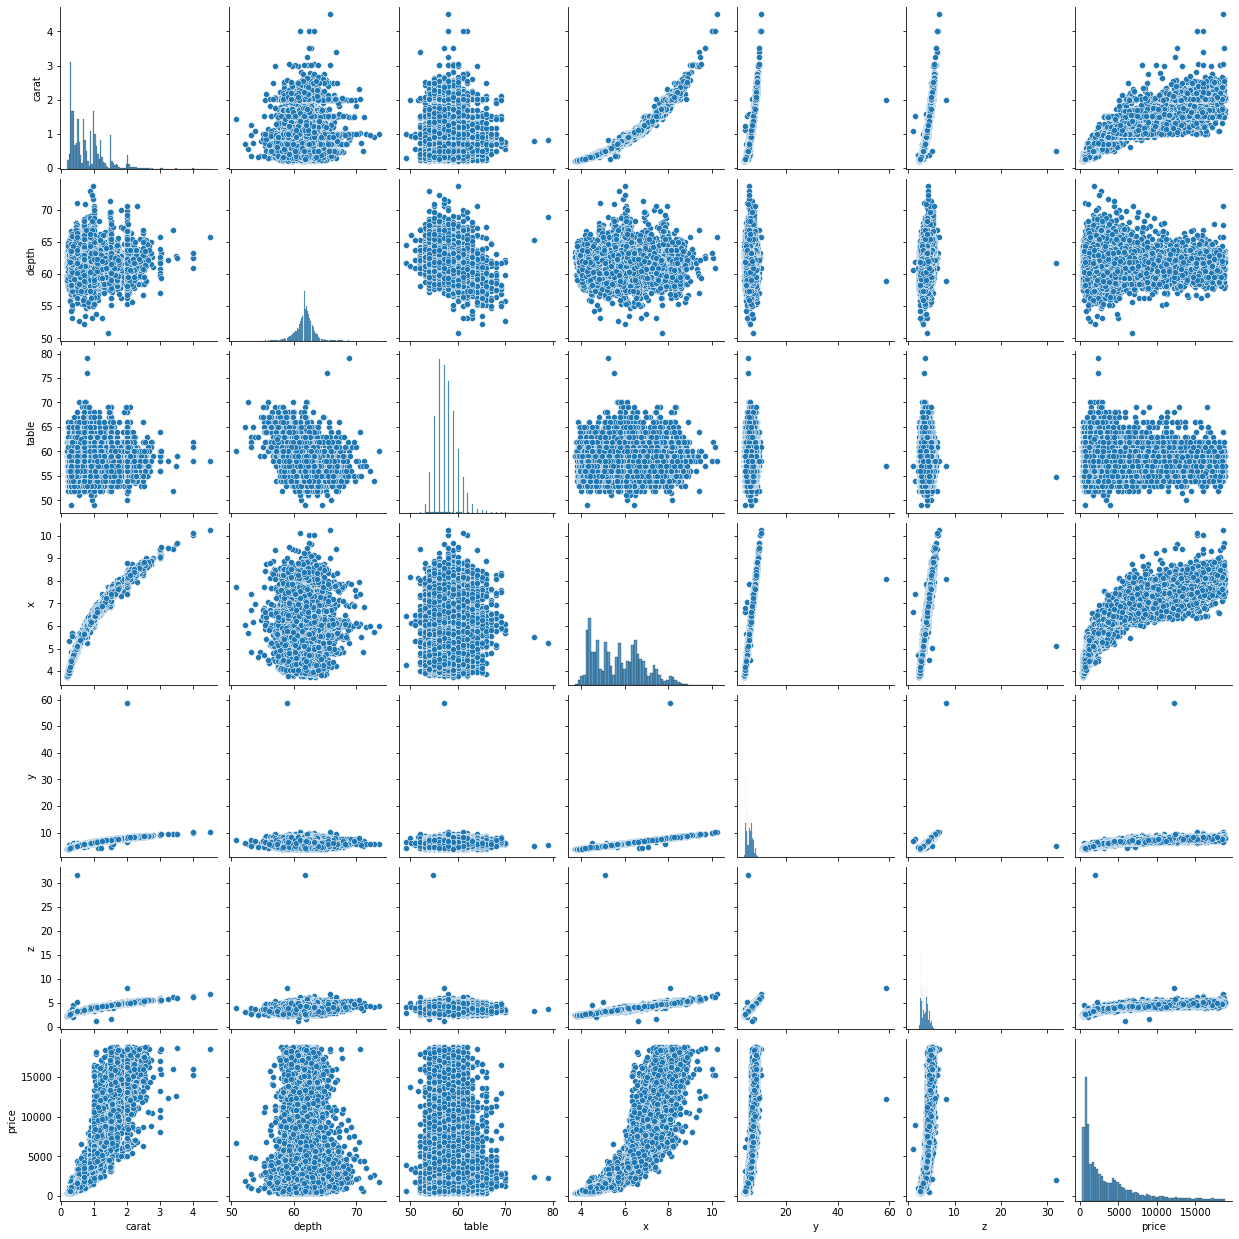

In [99]:
sns.pairplot(df)

## Correlation matrix

In [100]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035207,0.181669,0.977848,0.942393,0.946805,0.922409
depth,0.035207,1.000000,-0.293703,-0.018210,-0.024201,0.097099,-0.002349
table,0.181669,-0.293703,1.000000,0.197780,0.183832,0.151259,0.127088
x,0.977848,-0.018210,0.197780,1.000000,0.962590,0.961077,0.887501
y,0.942393,-0.024201,0.183832,0.962590,1.000000,0.933100,0.857361
z,0.946805,0.097099,0.151259,0.961077,0.933100,1.000000,0.855920
price,0.922409,-0.002349,0.127088,0.887501,0.857361,0.855920,1.000000


<AxesSubplot:>

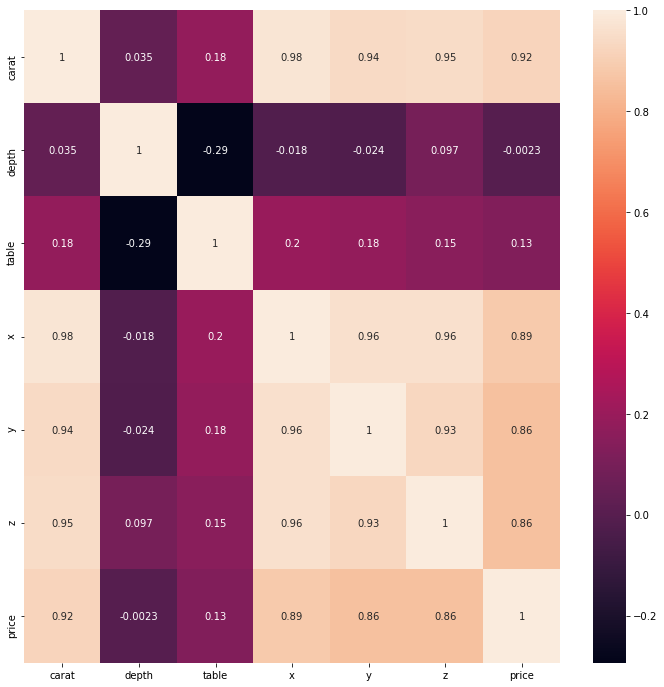

In [101]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot= True)

# Insights from pairplot and correlation matrix:
### 1. It is observed that the dimensions of cubic zirconia i.e. x, y and z are highly correlated to each other.
### 2. Dimensions x, y, z are highly positively correlated to the target variable price.
### 3. Carat variable is highly correlated to x, y, z and price.

### Encode categorical variables

In [102]:
for feature in df:
    if df[feature].dtype == "object":
        df[feature] = pd.Categorical(df[feature]).codes

In [103]:
df.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Check for skewness and outliers

In [104]:
df.skew()

carat      1.116530
cut       -0.179710
color      0.189002
clarity    0.178694
depth     -0.027923
table      0.764957
x          0.402531
y          3.879939
z          2.634182
price      1.618432
dtype: float64

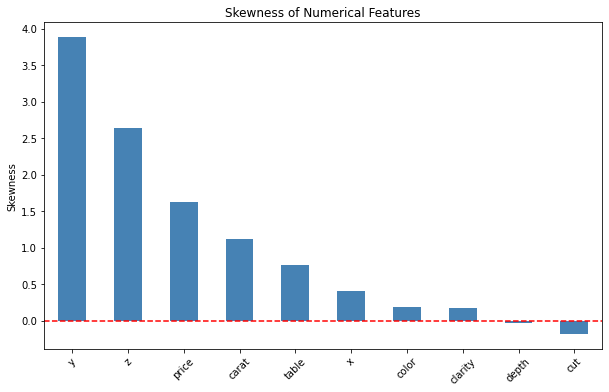

In [105]:
skew_vals = df.skew(numeric_only=True).sort_values(ascending=False)

plt.figure(figsize=(10,6))
skew_vals.plot(kind='bar', color='steelblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Skewness of Numerical Features")
plt.ylabel("Skewness")
plt.xticks(rotation=45)
plt.show()

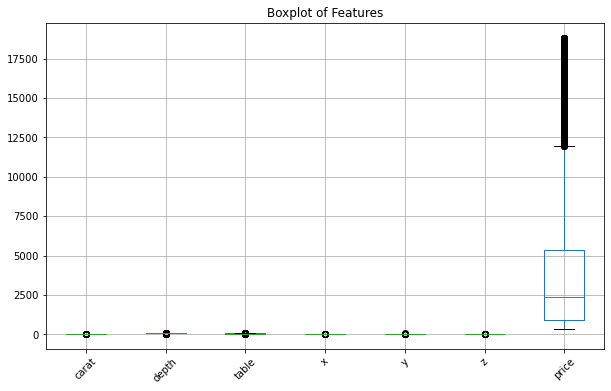

In [106]:
#Boxplot before scaling
df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].boxplot(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

### Attributes y, z, price and carat have skewness > 1. It would be beneficial to use log transform on those attributes to fix skewness as we are going to use this data for linear regression modelling where normality assumptions matter.

### Also, price attribute has a much larger range than other independent variables. Thus, scaling is necessary so that all the features are comparable on same scale. For that, we will use StandardScaler method.

In [107]:
skewed_cols = ["y", "z", "price", "carat"]
df[skewed_cols] = df[skewed_cols].apply(lambda x: np.log1p(x))

In [108]:
df.skew()

carat      0.585109
cut       -0.179710
color      0.189002
clarity    0.178694
depth     -0.027923
table      0.764957
x          0.402531
y          0.235818
z          0.247671
price      0.128548
dtype: float64

## Splitting the dataset by 70:30 into train and test sets respectively. Apply linear regression and checking the performance of the model to predict the price of stones using RMSE and R^2 scores.

In [112]:
X = df.drop(["price"], axis=1)
Y = df["price"]

In [113]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 18870, Test size: 8088


In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
lr= LinearRegression()

In [117]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Checking the model score
### Training data

In [118]:
lr.score(X_train_scaled, y_train)

0.9564578599168856

In [119]:
mse_train = np.mean((lr.predict(X_train_scaled) - y_train)**2)
mse_train

0.04496819244293818

In [120]:
import math


In [121]:
rmse_train = math.sqrt(mse_train)
rmse_train

0.21205704997226144

### Test data

In [122]:
lr.score(X_test_scaled, y_test)

0.9458323360651375

In [123]:
mse_test = np.mean((lr.predict(X_test_scaled) - y_test)**2)
mse_test

0.056949024340035015

In [124]:
rmse_test = math.sqrt(mse_test)
rmse_test

0.23863994707515968

In [125]:
y_test_pred = lr.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.3f}")
print(f"Test R² : {r2_test:.3f}")

Test MSE: 0.057
Test R² : 0.946


In [126]:
intercept = lr.intercept_
intercept

7.785587312804024

In [127]:
coefficients = pd.DataFrame({"Feature": X.columns,"Coefficient": lr.coef_})
print(coefficients)

   Feature  Coefficient
0    carat    -0.040496
1      cut     0.003970
2    color    -0.112653
3  clarity     0.110992
4    depth    -0.002022
5    table    -0.015302
6        x     0.069745
7        y     0.684388
8        z     0.328781


# Ridge Regression

In [129]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]}
grid_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             scoring='r2')

In [130]:
print("Best alpha:", grid_ridge.best_params_['alpha'])
print("Best cross-validated R2:", grid_ridge.best_score_)

Best alpha: 50
Best cross-validated R2: 0.956112148678058


In [131]:
# Evaluate on test set
best_model = grid_ridge.best_estimator_
r2_test = best_model.score(X_test_scaled, y_test)
print("Test R2:", r2_test)

Test R2: 0.9477053420582916


In [132]:
ridge_coefs = sorted(zip(X.columns, best_model.coef_), key=lambda x: abs(x[1]), reverse=True)
print("Top 5 features (Ridge):", ridge_coefs[:5])

Top 5 features (Ridge): [('y', 0.5369725424841431), ('z', 0.3877087889791904), ('x', 0.14138097891557747), ('color', -0.11326291250269954), ('clarity', 0.11023425000815543)]


# Random Forest 

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)


rf.fit(X_train, y_train)


y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

r2_train = rf.score(X_train, y_train)
r2_test = rf.score(X_test, y_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [134]:

print(f"Train R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Test  R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}")

Train R²: 0.9988, RMSE: 0.0358
Test  R²: 0.9909, RMSE: 0.0977


In [135]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 5 features:")
print(feature_importance.head(5))


Top 5 features:
   Feature  Importance
7        y    0.762741
0    carat    0.151902
6        x    0.034112
3  clarity    0.030744
2    color    0.014638


# Conclusion

### In this analysis, we applied both linear and tree-based models to predict diamond prices based on features such as carat, cut, color, clarity, depth, table and physical dimensions (x, y, z).

### Ridge Regression (α = 50) provided strong performance with a cross-validated R² of 0.956 and a test R² of 0.948. This model is interpretable and shows how features influence price directly:

#### Positive impact: clarity, x, y, z (higher values increase price).

#### Negative impact: color, carat, depth, table (higher values reduce price).

#### Among these, y, z, clarity, and color were the most influential features.

### Random Forest Regression achieved superior predictive accuracy with a test R² of 0.991 and a test RMSE of 0.098. 

### Feature importance analysis revealed:

#### y was by far the most important predictor, followed by carat, x, clarity, and color.

#### Random Forest captured nonlinear relationships and interactions between features that linear models cannot.